In [273]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [274]:

class cluster:
    def __init__(self, mean):
        self.mean = mean
        self.points = np.array([self.mean])

    def update_mean(self):
        if len(self.points) > 1:
            self.mean = np.sum(self.points[1:], axis = 0)
            self.mean /= len(self.points[1:])

    def push(self, point):
        self.points = np.append(self.points, [[point[i] for i in range(len(point))]], axis =0)
    
    def calc_dist(self, point):
        return np.dot(point - self.mean, point - self.mean)
    
    def flush_points(self):
        self.points = np.array([self.mean])

In [275]:
data = np.loadtxt('test3.csv', skiprows= 2, dtype= np.float64, delimiter= ',')
data

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [276]:
means = []
cluster_obj = []

k = int(input("number of cluster: "))

for i in range(k):
    mean = []
    for j in range(data.shape[1]):
        mini = np.min(data[:, j])
        maxi = np.max(data[:, j])
        mean.append(random.uniform(mini, maxi))
    means.append(mean)

for mean in means:
    cluster_obj.append(cluster(mean))

In [277]:
def choose_cluster(data, cluster_obj):
    for cluster in cluster_obj:
        cluster.flush_points()
        
    for point in data:
        dist = []
        for cluster in cluster_obj:
            distance = cluster.calc_dist(point)
            dist.append(distance)
        idx = np.argmin(dist)
        cluster_obj[idx].push(point)

def cluster_mean_update(cluster_obj):
    for cluster in cluster_obj:
        cluster.update_mean()

def calc_Jclust(cluster_obj):
    J_clust = 0
    for cluster in cluster_obj:
        for point in cluster.points:
            J_clust += cluster.calc_dist(point)**2
    
    return J_clust

In [278]:
epoch = int(input("number of iterations: "))

Jclust = []
epsilon = 0.00001
x = 0
plt.figure()
for i in range(epoch):
    jclust = calc_Jclust(cluster_obj)**2
    if jclust< epsilon and i > 100:
        break
    choose_cluster(data, cluster_obj)
    Jclust.append(jclust)
    cluster_mean_update(cluster_obj)

<Figure size 640x480 with 0 Axes>

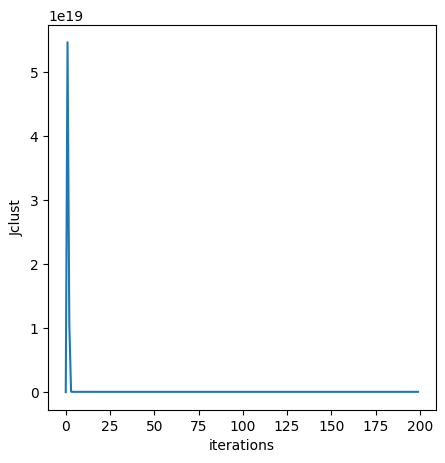

In [281]:
plt.figure(figsize=(5, 5))
plt.plot(Jclust)
plt.ylabel('Jclust')
plt.xlabel('iterations')
plt.show()

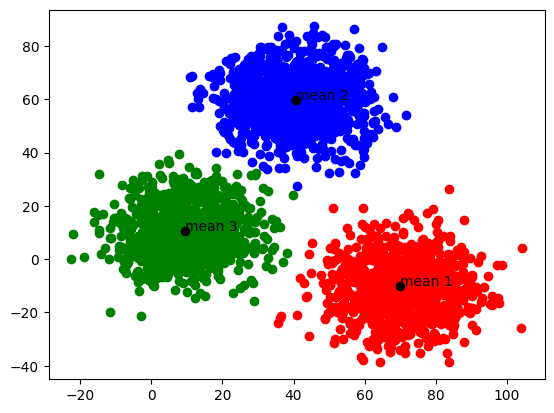

In [280]:
plt.figure()
color = ['red', 'blue', 'green', 'orange', 'lightgreen', 'cyan']
for cluster in cluster_obj:
    plt.scatter(cluster.points[1:, 0], cluster.points[1:, 1], color = color[cluster_obj.index(cluster)])

for cluster in cluster_obj:
    plt.scatter(cluster.points[0, 0], cluster.points[0, 1], color = 'black')
    plt.text(cluster.points[0, 0], cluster.points[0, 1], f'mean {cluster_obj.index(cluster) + 1}')

plt.show()